# **Valorización de Días de Descanso de los Accidentes de Trabajo - [Ministerio de Trabajo y Promoción del Empleo - MTPE]**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import geopandas as gpd

In [2]:
# Definición de funciones que se utilizarán en el desarrollo del análisis
def plotDecorator(ax):
    ax.bar_label(ax.containers[0], fontsize=11)
    for i in ['bottom', 'left']:
        ax.spines[i].set_color('black')
        ax.spines[i].set_linewidth(1.5) 
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)

In [3]:
path_local = r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\data'
data = pd.read_csv(path_local + r'\dataset_Accidentes_de_Trabajo.csv', encoding = 'latin-1',
                  converters = {'FECHA_CORTE':str, 'PERIODO_REGISTRO':str, 'FECHA_ACCIDENTE':str,
                               'UBIGEO':str})
data = data.dropna()
data.head()

FECHA_CORTE PERIODO_REGISTRO FECHA_ACCIDENTE  \
0    20230511           202304        20230419   
1    20230511           202304        20230410   
2    20230511           202304        20230410   
3    20230511           202304        20230427   
4    20230511           202304        20230411   

                                      TIPO_ACCIDENTE  \
0             ATRAPADA POR UN OBJETO O ENTRE OBJETOS   
1             ATRAPADA POR UN OBJETO O ENTRE OBJETOS   
2  OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR ...   
3                                    PUNZO CORTANTES   
4                                  CAÍDAS DE OBJETOS   

                    SUB_GRUPO_TIPO_ACCIDENTE  \
0                     ATRAPADA POR UN OBJETO   
1                     ATRAPADA POR UN OBJETO   
2  NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE   
3  NO REGISTRA SUBGRUPO DE TIPO DE ACCIDENTE   
4                    OTRAS CAÍDAS DE OBJETOS   

                                     AGENTE_CAUSANTE  \
0                                     OTROS APARATOS   
1              MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN   
2               MATERIALES, SUSTANCIAS Y RADIACIONES   
3  AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...   
4  AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUF...   

                         SUB_GRUPO_AGENTE_CAUSANTE_1  \
0  OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍG...   
1  MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE ...   
2  POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, ...   
3           NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE   
4           NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE   

                                      PARTE_AFECTADA      NATURALEZA_LESION  \
0                                   DEDOS DE LA MANO      HERIDAS CORTANTES   
1            MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)  TRAUMATISMOS INTERNOS   
2  ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANC...         INTOXICACIONES   
3            MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)      HERIDAS CORTANTES   
4  HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMOPLATO Y AX...            CONTUSIONES   

  DEPARTAMENTO  ... ESTADO_CIVIL CATEGORIA_OCUPACIONAL   TIPO_CONTRATO  \
0     AREQUIPA  ...    SOLTERO/A                 OTROS      PLAZO FIJO   
1         LIMA  ...    SOLTERO/A              OPERARIO      PLAZO FIJO   
2         LIMA  ...    SOLTERO/A              OPERARIO   INDETERMINADO   
3     AREQUIPA  ...    SOLTERO/A                  PEÓN  TIEMPO PARCIAL   
4       CALLAO  ...    SOLTERO/A              EMPLEADO   INDETERMINADO   

                       GRADO_INSTRUCCION   AREA_TRABAJO  EDAD TURNO_TRABAJO  \
0          EDUCACIÓN TÉCNICA COMPLETA(2)  MANTENIMIENTO  35.0           DÍA   
1          EDUCACIÓN SECUNDARIA COMPLETA     PRODUCCIÓN  18.0           DÍA   
2          EDUCACIÓN SECUNDARIA COMPLETA         PLANTA  32.0           DÍA   
3          EDUCACIÓN SECUNDARIA COMPLETA    ALBAÑILERIA  20.0           DÍA   
4  EDUCACIÓN UNIVERSITARIA INCOMPLETA(4)        ALMACÉN  36.0           DÍA   

        GRAVEDAD_ACCIDENTE DIAS_DESCANSO MONTO_DESCANSO  
0  ACCIDENTE INCAPACITANTE          11.0        1036.38  
1  ACCIDENTE INCAPACITANTE           5.0         349.30  
2  ACCIDENTE INCAPACITANTE           1.0          69.86  
3  ACCIDENTE INCAPACITANTE           5.0         349.30  
4  ACCIDENTE INCAPACITANTE           2.0         128.85  

[5 rows x 27 columns]

## **Entendiendo la estructura de la data y aplicando limpieza**

In [4]:
data.columns

Index(['FECHA_CORTE', 'PERIODO_REGISTRO', 'FECHA_ACCIDENTE', 'TIPO_ACCIDENTE',
       'SUB_GRUPO_TIPO_ACCIDENTE', 'AGENTE_CAUSANTE',
       'SUB_GRUPO_AGENTE_CAUSANTE_1', 'PARTE_AFECTADA', 'NATURALEZA_LESION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'ACTIVIDAD_ECONOMICA', 'SEGURO_SALUD', 'COBERTURA_PENSION',
       'SEXO_TRABAJADOR', 'ESTADO_CIVIL', 'CATEGORIA_OCUPACIONAL',
       'TIPO_CONTRATO', 'GRADO_INSTRUCCION', 'AREA_TRABAJO', 'EDAD',
       'TURNO_TRABAJO', 'GRAVEDAD_ACCIDENTE', 'DIAS_DESCANSO',
       'MONTO_DESCANSO'],
      dtype='object')

In [5]:
print(f'El dataset cuenta con {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataset cuenta con 30329 filas y 27 columnas.


In [6]:
print("¿El dataset cuenta con valores nulos por columna?")
data.isnull().sum()

¿El dataset cuenta con valores nulos por columna?


FECHA_CORTE                    0
PERIODO_REGISTRO               0
FECHA_ACCIDENTE                0
TIPO_ACCIDENTE                 0
SUB_GRUPO_TIPO_ACCIDENTE       0
AGENTE_CAUSANTE                0
SUB_GRUPO_AGENTE_CAUSANTE_1    0
PARTE_AFECTADA                 0
NATURALEZA_LESION              0
DEPARTAMENTO                   0
PROVINCIA                      0
DISTRITO                       0
UBIGEO                         0
ACTIVIDAD_ECONOMICA            0
SEGURO_SALUD                   0
COBERTURA_PENSION              0
SEXO_TRABAJADOR                0
ESTADO_CIVIL                   0
CATEGORIA_OCUPACIONAL          0
TIPO_CONTRATO                  0
GRADO_INSTRUCCION              0
AREA_TRABAJO                   0
EDAD                           0
TURNO_TRABAJO                  0
GRAVEDAD_ACCIDENTE             0
DIAS_DESCANSO                  0
MONTO_DESCANSO                 0
dtype: int64

In [7]:
print("Tipo de dato de las columnas")
data.dtypes

Tipo de dato de las columnas


FECHA_CORTE                     object
PERIODO_REGISTRO                object
FECHA_ACCIDENTE                 object
TIPO_ACCIDENTE                  object
SUB_GRUPO_TIPO_ACCIDENTE        object
AGENTE_CAUSANTE                 object
SUB_GRUPO_AGENTE_CAUSANTE_1     object
PARTE_AFECTADA                  object
NATURALEZA_LESION               object
DEPARTAMENTO                    object
PROVINCIA                       object
DISTRITO                        object
UBIGEO                          object
ACTIVIDAD_ECONOMICA             object
SEGURO_SALUD                    object
COBERTURA_PENSION               object
SEXO_TRABAJADOR                 object
ESTADO_CIVIL                    object
CATEGORIA_OCUPACIONAL           object
TIPO_CONTRATO                   object
GRADO_INSTRUCCION               object
AREA_TRABAJO                    object
EDAD                           float64
TURNO_TRABAJO                   object
GRAVEDAD_ACCIDENTE              object
DIAS_DESCANSO            

In [8]:
data["MONTO_DESCANSO"] = data["MONTO_DESCANSO"].astype('float') 

## **Análisis Exploratorio de los Datos**

In [9]:
data.describe()

EDAD  DIAS_DESCANSO  MONTO_DESCANSO
count  30329.000000   30329.000000    30329.000000
mean      35.661380       4.404959      323.323953
std       11.243598      22.083024     1537.749196
min       18.000000       0.000000        0.000000
25%       27.000000       2.000000       78.830000
50%       34.000000       3.000000      181.400000
75%       43.000000       5.000000      319.400000
max       70.000000    2828.000000   184421.420000

1. **Edad**: La edad promedio de los colaboradores que tuvieron un accidente de trabajo es de 36 años. Teniendo como máximo una edad de 70 y mínima de 18 años.

2. **Días descanso**: En promedio, los colaboradores que tuvieron un accidente de trabajo se le asignaron 5 días de descanso.

3. **Monto del descanso**: La valoración promedio asignada a los días de descanso por el accidente de trajado es de S/. 323, pero con un monto máximo alrededor de S/. 18,000.

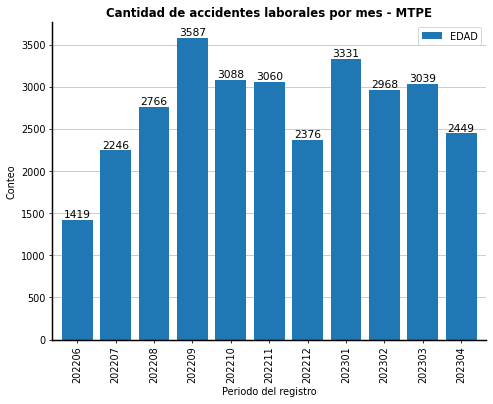

In [10]:
df1 = pd.DataFrame(data.groupby("PERIODO_REGISTRO")["EDAD"].count(
)).reset_index().sort_values("PERIODO_REGISTRO", ascending = True).set_index("PERIODO_REGISTRO")
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df1.plot(ax = ax, kind = 'bar', width=0.8)
plotDecorator(ax)
plt.xlabel("Periodo del registro")
plt.ylabel("Conteo")
plt.title("Cantidad de accidentes laborales por mes - MTPE", size = 12, fontweight = 'bold')
plt.show()

In [11]:
df1.pct_change().dropna().mean()*100

EDAD    8.621745
dtype: float64

In [12]:
print(f"El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de {round(df1.pct_change().dropna().mean().values[0]*100,2)}%.")

El crecimiento promedio mensual de la cantidad de accidentes laborales registrados por mes es de 8.62%.


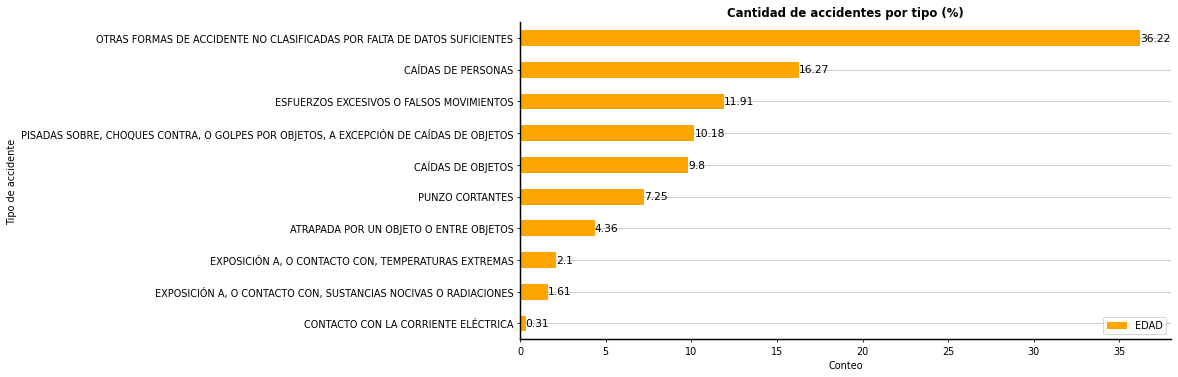

In [13]:
df2 = pd.DataFrame(data.groupby("TIPO_ACCIDENTE")["EDAD"].count(
    )).apply(lambda x : round(x / len(data["EDAD"])*100,2)).sort_values("EDAD")
fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
df2.plot(kind = 'barh', ax = ax, color = 'orange')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Tipo de accidente")
plt.title("Cantidad de accidentes por tipo (%)", size = 12, fontweight = 'bold')
plt.show()

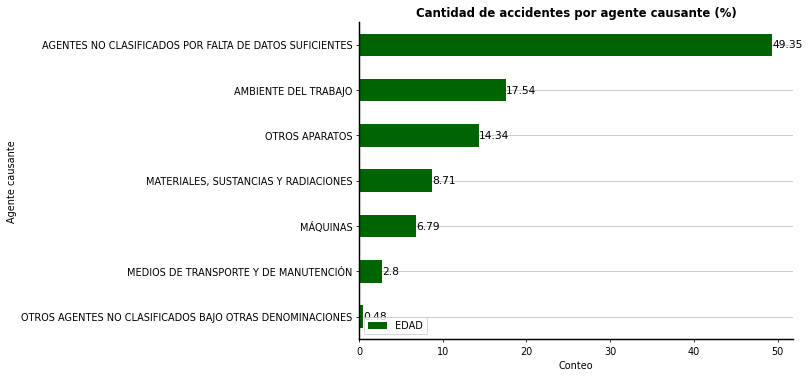

In [14]:
df3 = pd.DataFrame(data.groupby("AGENTE_CAUSANTE")["EDAD"].count()).apply(lambda x : round(x / len(data["EDAD"])*100,2))
df3 = df3.sort_values("EDAD")
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df3.plot(kind = 'barh', ax = ax, color = 'darkgreen')
plotDecorator(ax)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.xlabel("Conteo")
plt.ylabel("Agente causante")
plt.title("Cantidad de accidentes por agente causante (%)", size = 12, fontweight = 'bold')
plt.show()

In [15]:
pd.set_option('display.max_rows', None)
df4 = pd.DataFrame(data.groupby(["TIPO_ACCIDENTE", "AGENTE_CAUSANTE"])["EDAD"].count())
df4.sort_values(by=["TIPO_ACCIDENTE", "EDAD"], ascending = False)

EDAD
TIPO_ACCIDENTE                                     AGENTE_CAUSANTE                                         
PUNZO CORTANTES                                    AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   911
                                                   OTROS APARATOS                                       503
                                                   MÁQUINAS                                             312
                                                   AMBIENTE DEL TRABAJO                                 245
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 218
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                  9
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...     1
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJ... AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   816
                                                   OTROS APARATOS                                       710
                                                   AMBIENTE DEL TRABAJO                                 515
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 427
                                                   MÁQUINAS                                             367
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                249
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...     3
OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR F... AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...  8096
                                                   OTROS APARATOS                                       873
                                                   AMBIENTE DEL TRABAJO                                 858
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 482
                                                   MÁQUINAS                                             385
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                170
                                                   OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMI...   122
EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTR... MATERIALES, SUSTANCIAS Y RADIACIONES                 211
                                                   AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...   201
                                                   AMBIENTE DEL TRABAJO                                  83
                                                   OTROS APARATOS                                        80
                                                   MÁQUINAS                                              59
                                                   MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                  3
EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVA... MATERIALES, SUSTANCIAS Y RADIACIONES                 360
                                                   AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...    84
                                                   AMBIENTE DEL TRABAJO                                  24
                                                   MÁQUINAS                                              11
                                                   OTROS APARATOS                                         8
ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS           AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFI...  1798
                                                   AMBIENTE DEL TRABAJO                                 680
                                                   OTROS APARATOS                                       546
                                                   MATERIALES, SUSTANCIAS Y RADIACIONES                 333

In [16]:
pd.set_option('display.max_rows',None)
df5 = pd.DataFrame(data.groupby(["TIPO_ACCIDENTE","SUB_GRUPO_AGENTE_CAUSANTE_1"])["EDAD"].count(
        )).sort_values(["TIPO_ACCIDENTE","EDAD"], ascending = False)
df5

EDAD
TIPO_ACCIDENTE                                     SUB_GRUPO_AGENTE_CAUSANTE_1                             
PUNZO CORTANTES                                    NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE             912
                                                   OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍGR...   305
                                                   OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS B...   209
                                                   INTERIOR                                             203
                                                   HERRAMIENTAS, IMPLEMENTOS Y UTENSILIOS, A EXCEP...   160
                                                   OTRAS MÁQUINAS NO CLASIFICADAS BAJO OTROS EPÍGR...   150
                                                   MÁQUINAS PARA EL TRABAJO DEL METAL                    94
                                                   MÁQUINAS PARA TRABAJAR LA MADERA Y OTRAS MATERI...    58
                                                   EXTERIOR                                              42
                                                   HERRAMIENTAS ELÉCTRICAS MANUALES                      28
                                                   FRAGMENTOS VOLANTES                                    6
                                                   MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE L...     5
                                                   INSTALACIONES ELÉCTRICAS,INCLUIDOS LOS MOTORES ...     4
                                                   ANDAMIOS                                               3
                                                   GENERADORES DE ENERGÍA, EXCEPTO MOTORES ELÉCTRICOS     3
                                                   MÁQUINAS AGRÍCOLAS                                     3
                                                   OTROS MEDIOS DE TRANSPORTE                             3
                                                   POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, A...     3
                                                   MÁQUINAS PARA EL TRABAJO EN LAS MINAS                  2
                                                   SISTEMAS DE TRANSMISIÓN                                2
                                                   ANIMALES                                               1
                                                   HORNOS, FOGONES, ESTUFAS                               1
                                                   MEDIOS DE TRANSPORTE POR VÍA FÉRREA                    1
                                                   RECIPIENTES DE PRESIÓN                                 1
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJ... NO REGISTRA SUB GRUPO DE AGENTE CAUSANTE             816
                                                   OTROS APARATOS NO CLASIFICADOS BAJO OTROS EPÍGR...   441
                                                   INTERIOR                                             378
                                                   OTROS MATERIALES Y SUSTANCIAS NO CLASIFICADOS B...   301
                                                   OTRAS MÁQUINAS NO CLASIFICADAS BAJO OTROS EPÍGR...   215
                                                   HERRAMIENTAS, IMPLEMENTOS Y UTENSILIOS, A EXCEP...   164
                                                   MEDIOS DE TRANSPORTE RODANTES, A EXCEPCIÓN DE L...   136
                                                   EXTERIOR                                             128
                                                   FRAGMENTOS VOLANTES                                   79
                                                   OTROS MEDIOS DE TRANSPORTE                            72
                                                   MÁQUINAS PARA EL TRABAJO DEL METAL                    68
                                                   POLVOS, GASES, LÍQUIDOS Y PRODUCTOS QUÍMICOS, A...    46

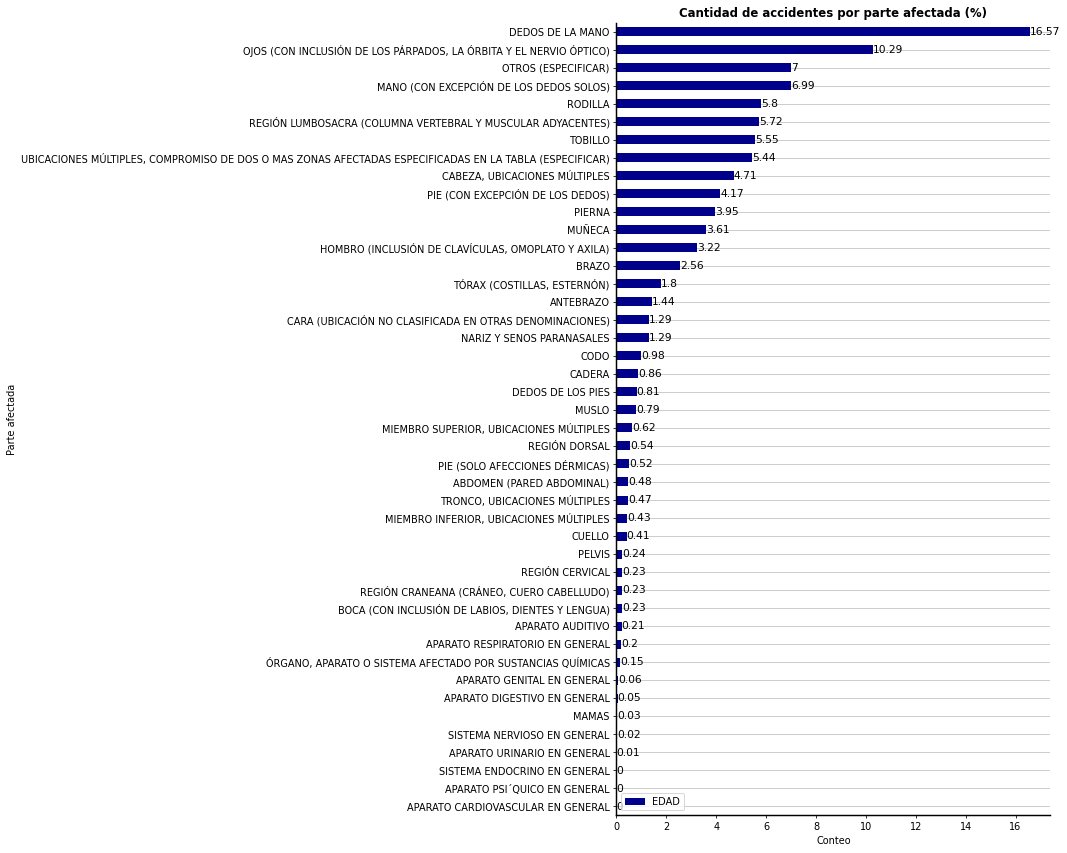

In [17]:
pd.reset_option('display.max_rows')
df6 = pd.DataFrame(data.groupby("PARTE_AFECTADA")["EDAD"].count()).sort_values("EDAD", ascending = True).apply(lambda x :
                    round(x/len(data["EDAD"])*100,2))
fig, ax = plt.subplots(figsize = (8,15), dpi = 70)
df6.plot(kind = 'barh', ax = ax, color = 'darkblue')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Parte afectada")
plt.title("Cantidad de accidentes por parte afectada (%)", size = 12, fontweight = 'bold')
plt.show()

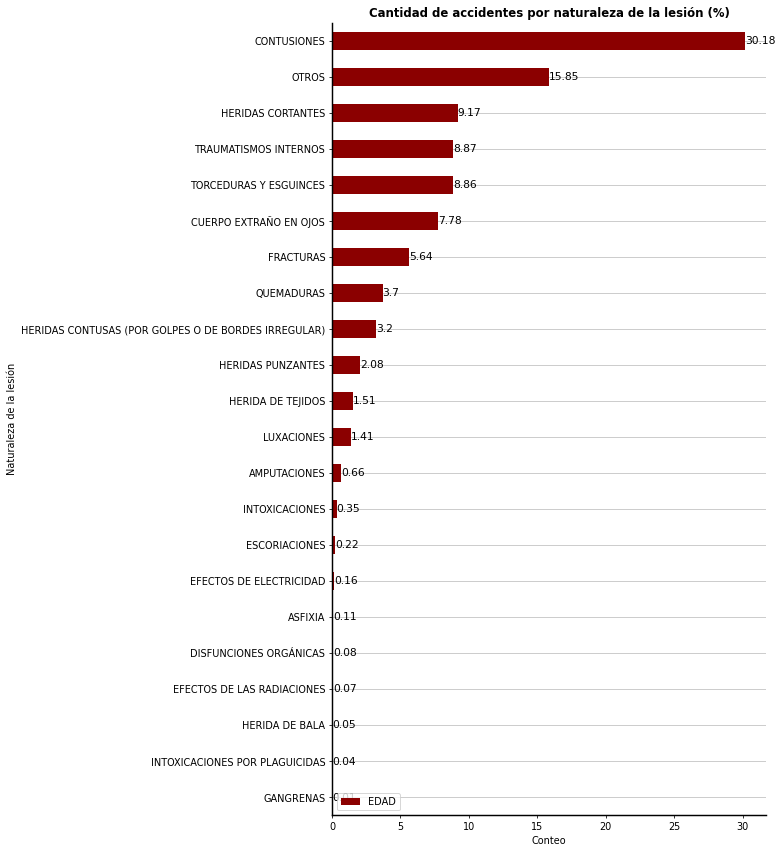

In [18]:
df7 = pd.DataFrame(data.groupby("NATURALEZA_LESION")["EDAD"].count()).sort_values("EDAD", ascending = True).apply(
    lambda x : round(x/len(data["EDAD"])*100,2)
)
fig, ax = plt.subplots(figsize = (8,15), dpi = 70)
df7.plot(kind = 'barh', ax = ax, color = 'darkred')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Naturaleza de la lesión")
plt.title("Cantidad de accidentes por naturaleza de la lesión (%)", size = 12, fontweight = 'bold')
plt.show()

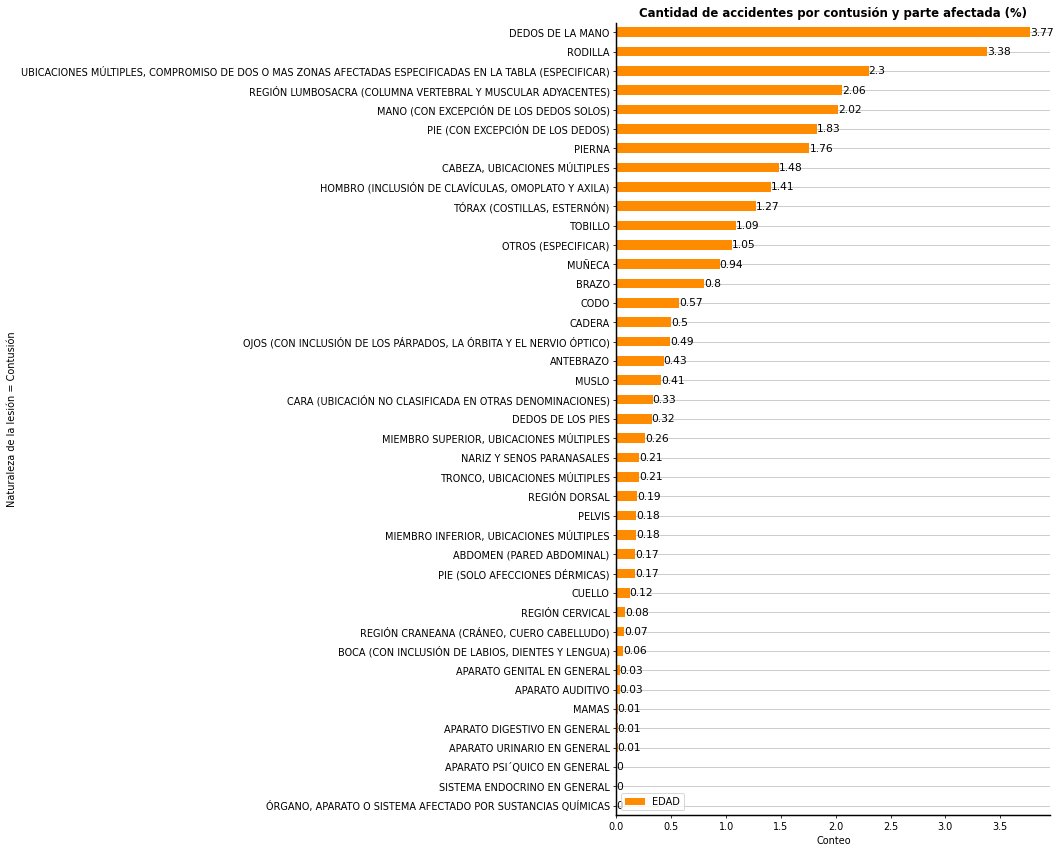

In [19]:
df8 = pd.DataFrame(data[data["NATURALEZA_LESION"] =="CONTUSIONES"].groupby("PARTE_AFECTADA")["EDAD"].count(
    )).sort_values("EDAD", ascending = True).apply(lambda x :
                        round(x / len(data["EDAD"]) *100, 2))
fig, ax = plt.subplots(figsize = (8,15), dpi = 70)
df8.plot(kind = 'barh', ax = ax, color = 'darkorange')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Naturaleza de la lesión = Contusión")
plt.title("Cantidad de accidentes por contusión y parte afectada (%)", size = 12, fontweight = 'bold')
plt.show()

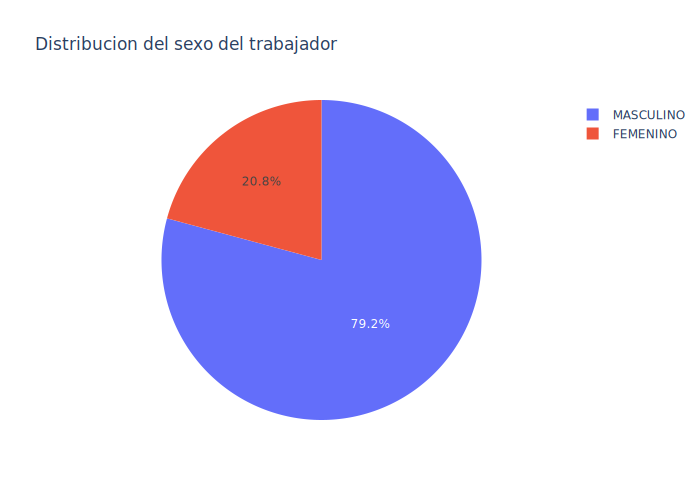

In [20]:
df9 = pd.DataFrame(data.groupby("SEXO_TRABAJADOR")["EDAD"].count()).apply(lambda x :
                                round(x / len(data["EDAD"]) * 100,2))
fig = px.pie(df9, values = df9["EDAD"], names = df9.index, 
            title = 'Distribucion del sexo del trabajador')
fig.show('svg')

In [21]:
grouped = data.groupby(["SEXO_TRABAJADOR", "SEGURO_SALUD"]).size()
df10 = grouped.groupby(level=0).apply(lambda x: (x / x.sum()) * 100).round(2)
df10 = pd.DataFrame(df10).rename(columns = {0:'Conteo (%)'})
df10

Conteo (%)
SEXO_TRABAJADOR SEGURO_SALUD                       
FEMENINO        EPS                           24.42
                ESSALUD                       70.16
                SEGURO PRIVADO DE SALUD        2.96
                SIS                            2.46
MASCULINO       EPS                           23.36
                ESSALUD                       71.13
                SEGURO PRIVADO DE SALUD        2.78
                SIS                            2.73

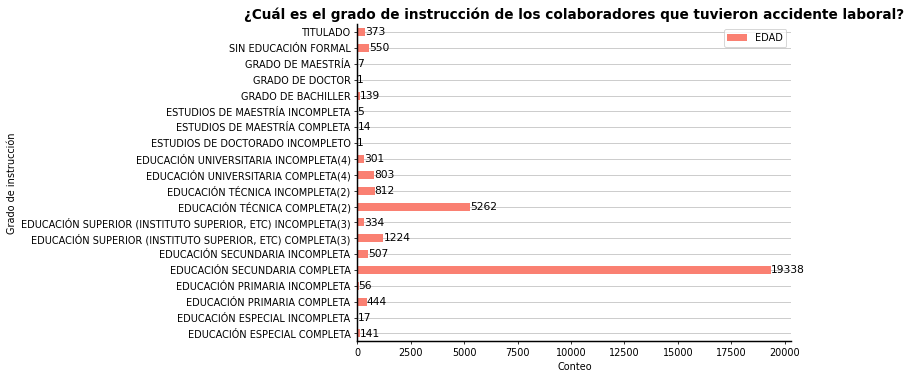

In [22]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df11 = pd.DataFrame(data.groupby("GRADO_INSTRUCCION")["EDAD"].count())
df11.plot(ax = ax, kind = 'barh', color = 'salmon')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Grado de instrucción")
plt.title("¿Cuál es el grado de instrucción de los colaboradores que tuvieron accidente laboral?", size = 14,
         fontweight = 'bold')
plt.show()

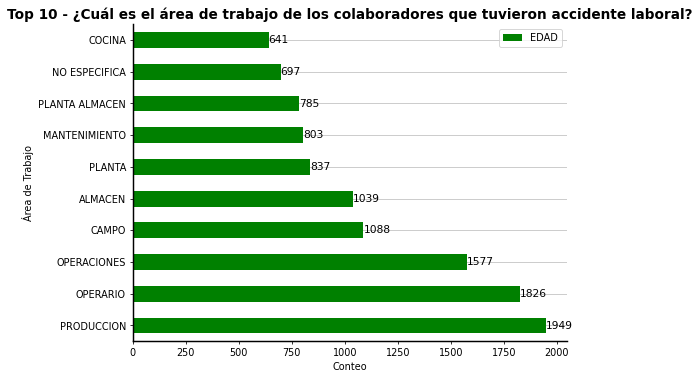

In [23]:
df12 = pd.DataFrame(data.groupby("AREA_TRABAJO")["EDAD"].count()).sort_values("EDAD", ascending = False)
df12 = df12.iloc[:10]
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df12.plot(ax = ax, kind = 'barh', color = 'green')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Área de Trabajo")
plt.title("Top 10 - ¿Cuál es el área de trabajo de los colaboradores que tuvieron accidente laboral?", size = 14,
         fontweight = 'bold')
plt.show()

In [24]:
df13 = pd.DataFrame(data.groupby("TURNO_TRABAJO")["EDAD"].count()).apply(lambda x : 
                        round(x/len(data["EDAD"])*100,2))
fig = px.pie(df13, values = "EDAD", names = df13.index, 
            title = 'Distribución de la cantidad de accidentes por turno de trabajo')
fig.show()

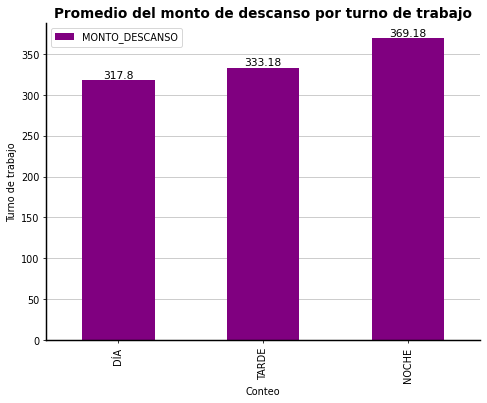

In [25]:
df13 = pd.DataFrame(data.groupby(["TURNO_TRABAJO"])["MONTO_DESCANSO"].mean())
df13 = round(df13, 2)
df13 = df13.sort_values("MONTO_DESCANSO", ascending = True)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
df13.plot(ax = ax, kind = 'bar', color = 'purple')
plotDecorator(ax)
plt.xlabel("Conteo")
plt.ylabel("Turno de trabajo")
plt.title("Promedio del monto de descanso por turno de trabajo", size = 14,
         fontweight = 'bold')
plt.show()

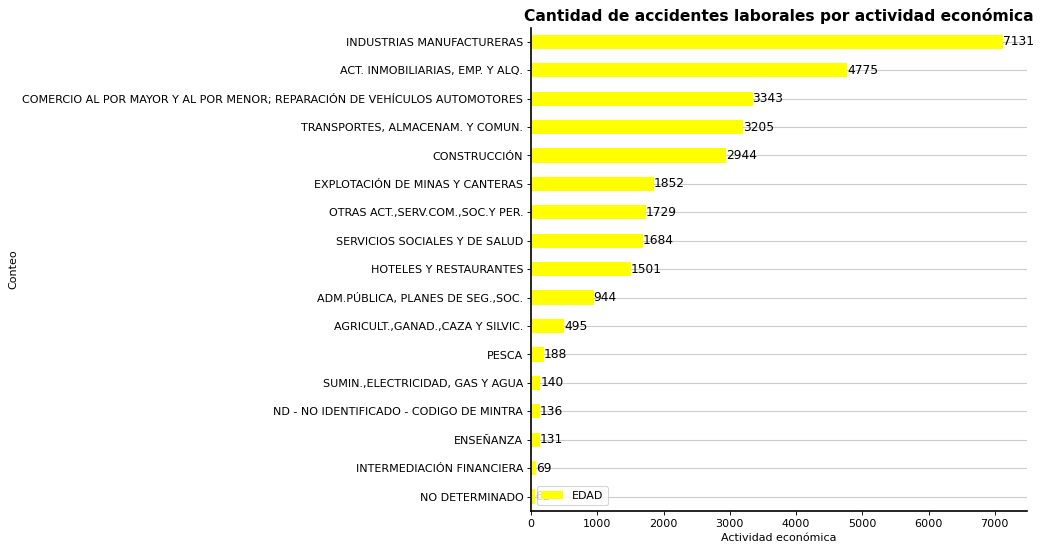

In [26]:
df15 = pd.DataFrame(data.groupby("ACTIVIDAD_ECONOMICA")["EDAD"].count())
df15 = df15.sort_values("EDAD", ascending = True)
fig, ax = plt.subplots(figsize = (8,8), dpi = 80)
df15.plot(ax = ax, kind = 'barh', color = 'yellow')
plotDecorator(ax)
plt.ylabel("Conteo")
plt.xlabel("Actividad económica")
plt.title("Cantidad de accidentes laborales por actividad económica", size = 14,
         fontweight = 'bold')
plt.show()

## **Análisis del riesgo laboral**
Para el presente análisis de riesgo laboral tomaré en cuenta aquellos datos que tengar días de descanso menor a 9 días porque existe una fuerte presencia de datos outliers que pueden hacer ruído en el análisis.

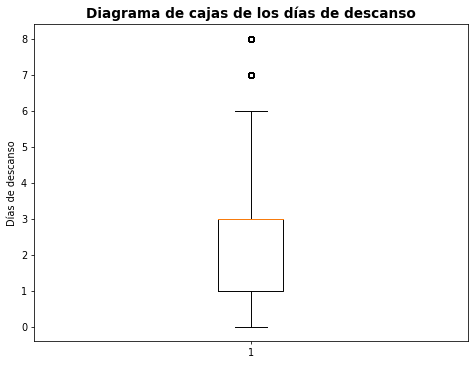

In [27]:
riesgo_laboral = data[(data["DIAS_DESCANSO"]<9) & (data["MONTO_DESCANSO"] <430)]
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.boxplot(riesgo_laboral["DIAS_DESCANSO"])
plt.ylabel("Días de descanso")
plt.title("Diagrama de cajas de los días de descanso", size = 14,
         fontweight = 'bold')
plt.show()

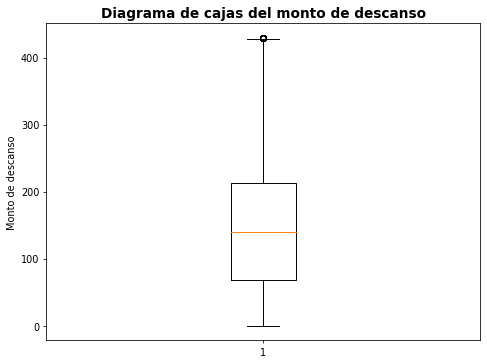

In [28]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
plt.boxplot(riesgo_laboral[riesgo_laboral["MONTO_DESCANSO"] <430]["MONTO_DESCANSO"])
plt.ylabel("Monto de descanso")
plt.title("Diagrama de cajas del monto de descanso", size = 14,
         fontweight = 'bold')
plt.show()

In [29]:
# Exportar Excel
riesgo_laboral.to_excel(r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\data\dataset_Accidentes_de_Trabajo_Limpio.xlsx', index = False)

Resultados del análisis de chi-cuadrado:
Chi-square statistic: 15.62
P-value: 0.0004


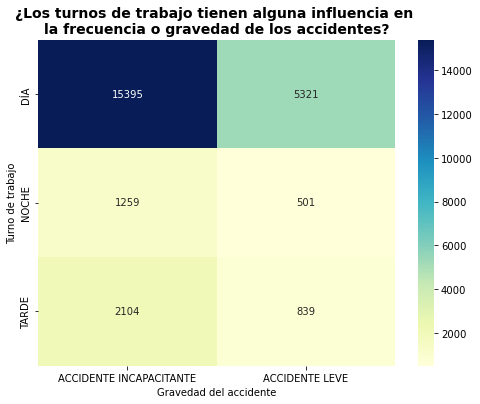


El p-values de 0.0004 < 0.05 nos indica que debemos rechazar la hipótesis nula,
entonces, esto sugiere que existe una asociación significativa entre los turnos
de trabajo y la gravedad de los accidentes. La gravedad de los accidentes no
es igualmente distribuida en todos los turnos de trabajo por lo que los turnos
de trabajo pueden estar influyendo en la gravedad de los accidentes.



In [30]:
tabla_contingencia = pd.crosstab(riesgo_laboral["TURNO_TRABAJO"], riesgo_laboral["GRAVEDAD_ACCIDENTE"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Resultados del análisis de chi-cuadrado:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(tabla_contingencia, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.xlabel("Gravedad del accidente")
plt.ylabel("Turno de trabajo")
plt.title("¿Los turnos de trabajo tienen alguna influencia en \nla frecuencia o gravedad de los accidentes?", 
          size = 14, fontweight = 'bold')
plt.show()
print('''
El p-values de 0.0004 < 0.05 nos indica que debemos rechazar la hipótesis nula,
entonces, esto sugiere que existe una asociación significativa entre los turnos
de trabajo y la gravedad de los accidentes. La gravedad de los accidentes no
es igualmente distribuida en todos los turnos de trabajo por lo que los turnos
de trabajo pueden estar influyendo en la gravedad de los accidentes.
''')

Resultados del análisis de chi-cuadrado:
Chi-square statistic: 3216.66
P-value: 0.0000


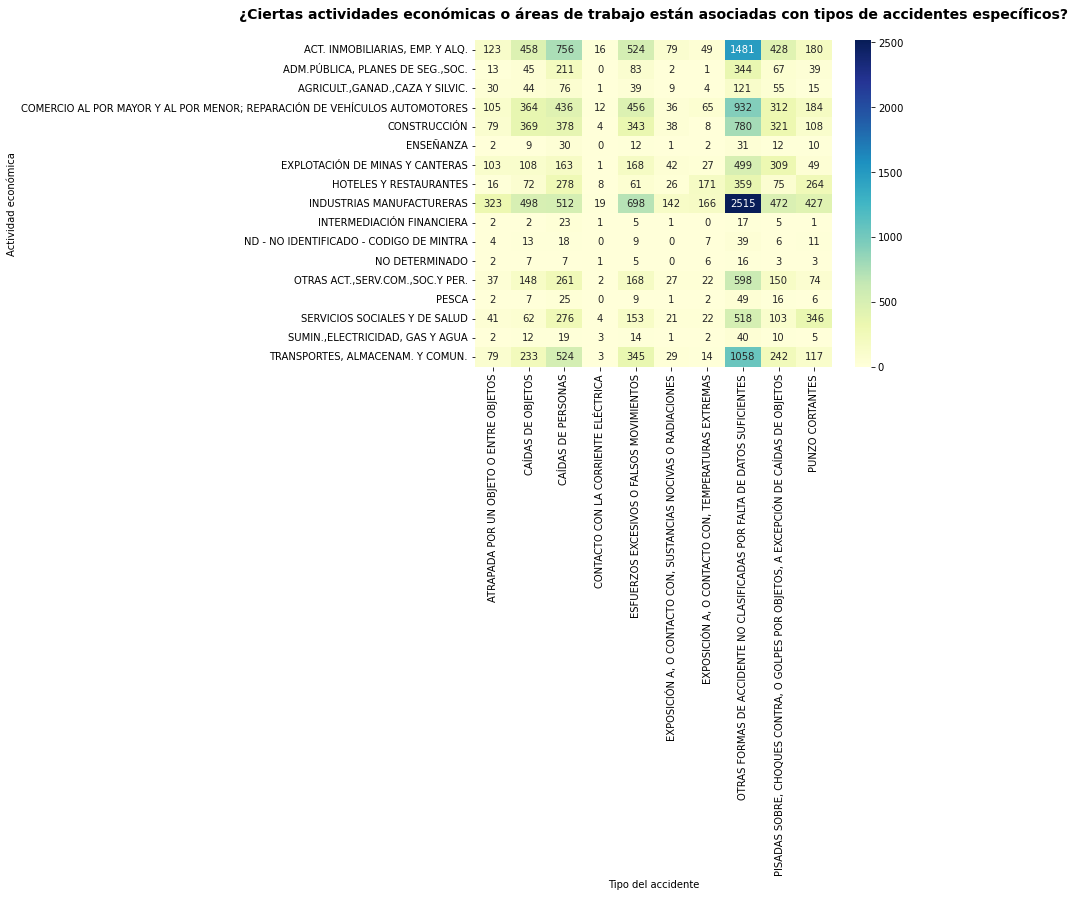


El p-values de 0.000 < 0.05 nos indica que debemos rechazar la hipótesis nula,
entonces, esto sugiere que existe una asociación significativa entre la 
actividad económica y el tipo de accidente. Los tipos de accidentes no
son igualmente distribuidos en todas las actividades económicas por lo que 
las actividades económicas pueden estar influyendo en los tipos de accidentes.



In [31]:
tabla_contingencia2 = pd.crosstab(riesgo_laboral["ACTIVIDAD_ECONOMICA"], riesgo_laboral["TIPO_ACCIDENTE"])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)
print("Resultados del análisis de chi-cuadrado:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(tabla_contingencia2, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.xlabel("Tipo del accidente")
plt.ylabel("Actividad económica")
plt.title("¿Ciertas actividades económicas o áreas de trabajo están asociadas con tipos de accidentes específicos?\n", 
          size = 14, fontweight = 'bold')
plt.show()
print('''
El p-values de 0.000 < 0.05 nos indica que debemos rechazar la hipótesis nula,
entonces, esto sugiere que existe una asociación significativa entre la 
actividad económica y el tipo de accidente. Los tipos de accidentes no
son igualmente distribuidos en todas las actividades económicas por lo que 
las actividades económicas pueden estar influyendo en los tipos de accidentes.
''')

## **Análisis de Seguridad y Cobertura**

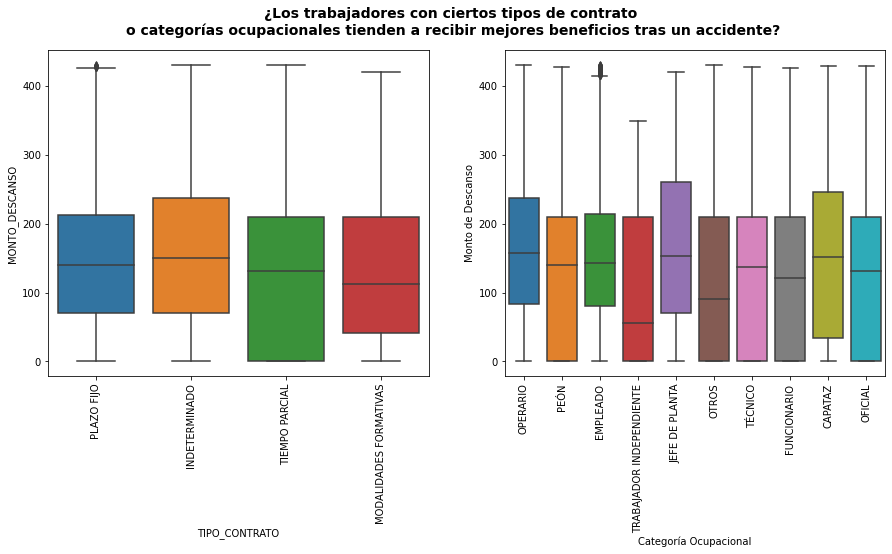

In [32]:
data_cobertura = riesgo_laboral[["TIPO_CONTRATO", "CATEGORIA_OCUPACIONAL", "DIAS_DESCANSO", "MONTO_DESCANSO"]]
data_cobertura = data_cobertura.dropna()
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.boxplot(x = "TIPO_CONTRATO", y = "MONTO_DESCANSO", data = data_cobertura, ax = ax[0])
plt.xlabel("Tipo de contrato")
plt.ylabel("Monto de descanso")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.boxplot(x='CATEGORIA_OCUPACIONAL', y='MONTO_DESCANSO', data=data_cobertura, ax = ax[1])
plt.xlabel('Categoría Ocupacional')
plt.ylabel('Monto de Descanso')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90) 

fig.suptitle("¿Los trabajadores con ciertos tipos de contrato \no categorías ocupacionales tienden a recibir mejores beneficios tras un accidente?",
            size = 14, fontweight = 'bold')
plt.show()

In [33]:
df16 = pd.DataFrame(riesgo_laboral.groupby("DEPARTAMENTO")["EDAD"].count()).sort_values("EDAD", ascending = False)
df16.style.background_gradient('coolwarm')

In [34]:
aggregated_data = riesgo_laboral.groupby(['PARTE_AFECTADA', 'DEPARTAMENTO']).size().reset_index(name='CANTIDAD_ACCIDENTES')
max_accidents_per_department = aggregated_data.groupby('DEPARTAMENTO').apply(lambda x: x[x['CANTIDAD_ACCIDENTES'] == x['CANTIDAD_ACCIDENTES'].max()])
max_accidents_per_department.sort_values(["CANTIDAD_ACCIDENTES"], ascending = False)

PARTE_AFECTADA  \
DEPARTAMENTO                                                                  
LIMA                 184                                   DEDOS DE LA MANO   
AREQUIPA             173                                   DEDOS DE LA MANO   
CALLAO               344                                OTROS (ESPECIFICAR)   
ANCASH               319  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
CUSCO                177                                   DEDOS DE LA MANO   
PIURA                189                                   DEDOS DE LA MANO   
MOQUEGUA             186                                   DEDOS DE LA MANO   
LAMBAYEQUE           330  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
PASCO                188                                   DEDOS DE LA MANO   
ICA                  180                                   DEDOS DE LA MANO   
CAJAMARCA            322  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
JUNIN                349                                OTROS (ESPECIFICAR)   
LA LIBERTAD          329  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
                     182                                   DEDOS DE LA MANO   
TACNA                192                                   DEDOS DE LA MANO   
TUMBES               193                                   DEDOS DE LA MANO   
HUANCAVELICA         178                                   DEDOS DE LA MANO   
HUANUCO              179                                   DEDOS DE LA MANO   
APURIMAC             172                                   DEDOS DE LA MANO   
NO DATA DEPARTAMENTO 187                                   DEDOS DE LA MANO   
AYACUCHO             174                                   DEDOS DE LA MANO   
LORETO               102                      CABEZA, UBICACIONES MÚLTIPLES   
                     332  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
SAN MARTIN           337  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
PUNO                 465  REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULA...   
AMAZONAS             14                                           ANTEBRAZO   
                     434                                      REGIÓN DORSAL   
                     539  UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS...   
UCAYALI              87                                               BRAZO   

                                  DEPARTAMENTO  CANTIDAD_ACCIDENTES  
DEPARTAMENTO                                                         
LIMA                 184                  LIMA                 2722  
AREQUIPA             173              AREQUIPA                  288  
CALLAO               344                CALLAO                  258  
ANCASH               319                ANCASH                  163  
CUSCO                177                 CUSCO                   72  
PIURA                189                 PIURA                   70  
MOQUEGUA             186              MOQUEGUA                   55  
LAMBAYEQUE           330            LAMBAYEQUE                   52  
PASCO                188                 PASCO                   35  
ICA                  180                   ICA                   31  
CAJAMARCA            322             CAJAMARCA                   28  
JUNIN                349                 JUNIN                   27  
LA LIBERTAD          329           LA LIBERTAD                   21  
                     182           LA LIBERTAD                   21  
TACNA                192                 TACNA                   18  
TUMBES               193                TUMBES                   13  
HUANCAVELICA         178          HUANCAVELICA                   12  
HUANUCO              179               HUANUCO                   11  
APURIMAC             172              APURIMAC                   11  
NO DATA DEPARTAMENTO 187  NO DATA DEPARTAMENTO                   10  
AYACUCHO             174              AYACUCHO                    7  
L

In [35]:
aggregated_data2 = riesgo_laboral.groupby(["DEPARTAMENTO","ACTIVIDAD_ECONOMICA", "PARTE_AFECTADA"]).size().reset_index(name = 'CANTIDAD_ACCIDENTES')
max_accidents_by_activity = aggregated_data2.groupby(["DEPARTAMENTO", "ACTIVIDAD_ECONOMICA"]).apply(lambda x : x[x["CANTIDAD_ACCIDENTES"] == x["CANTIDAD_ACCIDENTES"].max()])
max_accidents_by_activity.sort_values("CANTIDAD_ACCIDENTES", ascending = False)

DEPARTAMENTO  \
DEPARTAMENTO ACTIVIDAD_ECONOMICA                                                    
LIMA         INDUSTRIAS MANUFACTURERAS                          1638         LIMA   
             ACT. INMOBILIARIAS, EMP. Y ALQ.                    1370         LIMA   
             COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓ... 1467         LIMA   
             SERVICIOS SOCIALES Y DE SALUD                      1800         LIMA   
             HOTELES Y RESTAURANTES                             1599         LIMA   
...                                                                           ...   
JUNIN        OTRAS ACT.,SERV.COM.,SOC.Y PER.                    1163        JUNIN   
                                                                1164        JUNIN   
                                                                1165        JUNIN   
                                                                1166        JUNIN   
UCAYALI      TRANSPORTES, ALMACENAM. Y COMUN.                   2386      UCAYALI   

                                                                                                    ACTIVIDAD_ECONOMICA  \
DEPARTAMENTO ACTIVIDAD_ECONOMICA                                                                                          
LIMA         INDUSTRIAS MANUFACTURERAS                          1638                          INDUSTRIAS MANUFACTURERAS   
             ACT. INMOBILIARIAS, EMP. Y ALQ.                    1370                    ACT. INMOBILIARIAS, EMP. Y ALQ.   
             COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓ... 1467  COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...   
             SERVICIOS SOCIALES Y DE SALUD                      1800                      SERVICIOS SOCIALES Y DE SALUD   
             HOTELES Y RESTAURANTES                             1599                             HOTELES Y RESTAURANTES   
...                                                                                                                 ...   
JUNIN        OTRAS ACT.,SERV.COM.,SOC.Y PER.                    1163                    OTRAS ACT.,SERV.COM.,SOC.Y PER.   
                                                                1164                    OTRAS ACT.,SERV.COM.,SOC.Y PER.   
                                                                1165                    OTRAS ACT.,SERV.COM.,SOC.Y PER.   
                                                                1166                    OTRAS ACT.,SERV.COM.,SOC.Y PER.   
UCAYALI      TRANSPORTES, ALMACENAM. Y COMUN.                   2386                   TRANSPORTES, ALMACENAM. Y COMUN.   

                                                                                                         PARTE_AFECTADA  \
DEPARTAMENTO ACTIVIDAD_ECONOMICA                                                                                          
LIMA         INDUSTRIAS MANUFACTURERAS                          1638                                   DEDOS DE LA MANO   
             ACT. INMOBILIARIAS, EMP. Y ALQ.                    1370                                   DEDOS DE LA MANO   
             COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓ... 1467                                   DEDOS DE LA MANO   
             SERVICIOS SOCIALES Y DE SALUD                      1800                                   DEDOS DE LA MANO   
             HOTELES Y RESTAURANTES                             1599                                   DEDOS DE LA MANO   
...                                                                                                                 ...   
JUNIN        OTRAS ACT.,SERV.COM.,SOC.Y PER.                    1163   BOCA (CON INCLUSIÓN DE LABIOS, DIENTES Y LENGUA)   
                                                                1164                                   DEDOS DE LA MANO   
                                                                1165  OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA...   
          

In [36]:
map_dep = pd.DataFrame(riesgo_laboral.groupby("DEPARTAMENTO")["EDAD"].count())
map_dep = map_dep.reset_index().rename(columns = {'EDAD':'CANTIDAD',
                                                 'DEPARTAMENTO':'DEPARTAMEN'})
map_dep["CANTIDAD"] = map_dep["CANTIDAD"].apply(lambda x : 
                    round(x/sum(map_dep["CANTIDAD"])*100,4))
map_dep

DEPARTAMEN  CANTIDAD
0               AMAZONAS    0.0118
1                 ANCASH    2.8089
2               APURIMAC    0.1298
3               AREQUIPA    7.8957
4               AYACUCHO    0.1023
5              CAJAMARCA    0.7317
6                 CALLAO    7.4118
7                  CUSCO    0.8891
8           HUANCAVELICA    0.2518
9                HUANUCO    0.2675
10                   ICA    0.7042
11                 JUNIN    0.6098
12           LA LIBERTAD    0.5586
13            LAMBAYEQUE    0.9442
14                  LIMA   71.6747
15                LORETO    0.0984
16              MOQUEGUA    1.1999
17  NO DATA DEPARTAMENTO    0.2124
18                 PASCO    0.9638
19                 PIURA    1.7821
20                  PUNO    0.0472
21            SAN MARTIN    0.0275
22                 TACNA    0.5468
23                TUMBES    0.1259
24               UCAYALI    0.0039

In [37]:
data_shp = gpd.read_file(r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\map\DEPARTAMENTOS.shp')

In [38]:
data_shp = pd.merge(data_shp, map_dep, on = 'DEPARTAMEN', how = 'left').fillna(0)
data_shp

IDDPTO     DEPARTAMEN           CAPITAL FUENTE  CANTIDAD_x  CANTIDAD_y  \
0      01       AMAZONAS       CHACHAPOYAS   INEI      0.0118      0.0118   
1      02         ANCASH            HUARAZ   INEI      2.8089      2.8089   
2      03       APURIMAC           ABANCAY   INEI      0.1298      0.1298   
3      04       AREQUIPA          AREQUIPA   INEI      7.8957      7.8957   
4      05       AYACUCHO          AYACUCHO   INEI      0.1023      0.1023   
5      06      CAJAMARCA         CAJAMARCA   INEI      0.7317      0.7317   
6      07         CALLAO            CALLAO   INEI      7.4118      7.4118   
7      08          CUSCO             CUSCO   INEI      0.8891      0.8891   
8      09   HUANCAVELICA      HUANCAVELICA   INEI      0.2518      0.2518   
9      10        HUANUCO           HUANUCO   INEI      0.2675      0.2675   
10     11            ICA               ICA   INEI      0.7042      0.7042   
11     12          JUNIN          HUANCAYO   INEI      0.6098      0.6098   
12     13    LA LIBERTAD          TRUJILLO   INEI      0.5586      0.5586   
13     14     LAMBAYEQUE          CHICLAYO   INEI      0.9442      0.9442   
14     15           LIMA              LIMA   INEI     71.6747     71.6747   
15     16         LORETO           IQUITOS   INEI      0.0984      0.0984   
16     17  MADRE DE DIOS  PUERTO MALDONADO   INEI      0.0000      0.0000   
17     18       MOQUEGUA          MOQUEGUA   INEI      1.1999      1.1999   
18     19          PASCO    CERRO DE PASCO   INEI      0.9638      0.9638   
19     20          PIURA             PIURA   INEI      1.7821      1.7821   
20     21           PUNO              PUNO   INEI      0.0472      0.0472   
21     22     SAN MARTIN         MOYOBAMBA   INEI      0.0275      0.0275   
22     23          TACNA             TACNA   INEI      0.5468      0.5468   
23     24         TUMBES            TUMBES   INEI      0.1259      0.1259   
24     25        UCAYALI          PUCALLPA   INEI      0.0039      0.0039   

                                             geometry  CANTIDAD  
0   POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...    0.0118  
1   POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...    2.8089  
2   POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...    0.1298  
3   POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...    7.8957  
4   POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...    0.1023  
5   POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...    0.7317  
6   POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...    7.4118  
7   POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...    0.8891  
8   POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...    0.2518  
9   POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...    0.2675  
10  POLYGON ((-75.61136 -12.96649, -75.61103 -12.9...    0.7042  
11  POLYGON ((-75.03564 -10.68232, -75.03436 -10.6...    0.6098  
12  POLYGON ((-77.75753 -6.96579, -77.75638 -6.967...    0.5586  
13  POLYGON ((-79.88373 -5.49283, -79.88265 -5.494...    0.9442  
14  MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   71.6747  
15  POLYGON ((-75.10004 -0.08096, -75.09485 -0.081...    0.0984  
16  POLYGON ((-70.61346 -10.12964, -70.61359 -10.2...    0.0000  
17  POLYGON ((-70.79388 -15.98721, -70.79486 -15.9...    1.1999  
18  POLYGON ((-74.68005 -9.44727, -74.67872 -9.448...    0.9638  
19  POLYGON ((-80.48552 -4.08443, -80.48403 -4.085...    1.7821  
20  MULTIPOLYGON (((-68.81422 -16.34799, -68.91839...    0.0472  
21  POLYGON ((-77.71678 -5.41597, -77.71270 -5.416...    0.0275  
22  POLYGON ((-70.26604 -16.77955, -70.26474 -16.7...    0.5468  
23  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...    0.1259  
24  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...    0.0039

In [39]:
#output_path = r'C:\Users\Fabrizio\Documents\Datathon_PNDA\Datathon-PNDA\map\DEPARTAMENTOS.shp'
#data_shp.to_file(output_path)

## **Hipótesis**

1.  **La gravedad de los accidentes laborales está relacionada con el tipo de contrato y varía según el turno de trabajo.**

TURNO_TRABAJO                                    DÍA  NOCHE  TARDE
GRAVEDAD_ACCIDENTE      TIPO_CONTRATO                             
ACCIDENTE INCAPACITANTE INDETERMINADO           4857    381    707
                        MODALIDADES FORMATIVAS   369     31     63
                        PLAZO FIJO              7496    597   1024
                        TIEMPO PARCIAL          2673    250    310
ACCIDENTE LEVE          INDETERMINADO           1437    162    260
                        MODALIDADES FORMATIVAS   254     33     66
                        PLAZO FIJO              2126    243    350
                        TIEMPO PARCIAL          1504     63    163


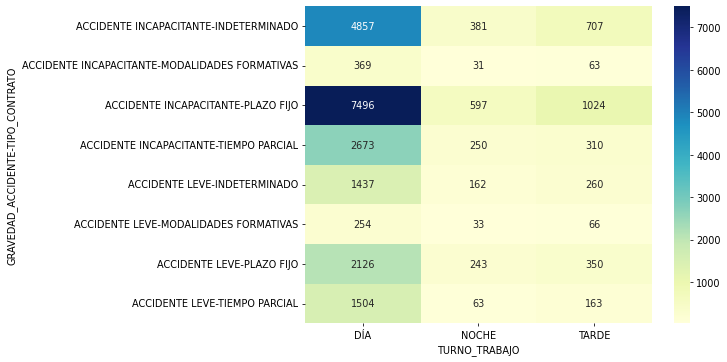

In [40]:
contingency_table3 = pd.crosstab(index=[riesgo_laboral["GRAVEDAD_ACCIDENTE"],
                    riesgo_laboral["TIPO_CONTRATO"]], 
                        columns = riesgo_laboral["TURNO_TRABAJO"])
print(contingency_table3)
fig, ax = plt.subplots(figsize = (8,6), dpi = 70)
sns.heatmap(contingency_table3, cmap = 'YlGnBu', annot = True, fmt = 'd')
plt.show()

In [49]:
contingency_table = pd.crosstab(index=[data['GRAVEDAD_ACCIDENTE'], data['TIPO_CONTRATO']],
                                columns=data['TURNO_TRABAJO'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir los resultados
print("Estadístico Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:\n", expected)

Estadístico Chi-cuadrado: 129.31657042339526
Valor p: 9.273445548552961e-21
Grados de libertad: 14
Tabla de frecuencias esperadas:
 [[6194.80981899  552.31989185  901.87028916]
 [ 518.32635431   46.21319529   75.46045039]
 [9256.17484915  825.26657654 1347.5585743 ]
 [3198.23558311  285.14985657  465.61456032]
 [1505.5760823   134.2348907   219.189027  ]
 [ 285.8893798    25.48946553   41.62115467]
 [2202.88700584  196.40607999  320.70691417]
 [1401.10092651  124.92004352  203.97902997]]


## **Comprobación de hipótesis**

**Hipótesis:**

<p style="align:center">$H0: \text{Las variables son independientes}$</p>

<p style="align:center">$H1: \text{Las variables muestran diferencias significativas}$</p>

In [54]:
riesgo_laboral_lima = riesgo_laboral[riesgo_laboral["DEPARTAMENTO"] == "LIMA"]
q1 = pd.crosstab(riesgo_laboral_lima["TIPO_CONTRATO"], riesgo_laboral_lima["GRAVEDAD_ACCIDENTE"])
q1.style.background_gradient()

In [55]:
chi2, p, dof, expected = chi2_contingency(q1)
alpha = 0.05
print(f"Estadístico Chi cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
if p < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia de asociación.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia de asociación.")

Estadístico Chi cuadrado: 521.6939255779413
P-valor: 9.485964181968559e-113
Grados de libertad: 3
Se rechaza la hipótesis nula. Hay evidencia de asociación.


In [56]:
q2 = pd.crosstab(riesgo_laboral_lima["GRAVEDAD_ACCIDENTE"], riesgo_laboral_lima["TURNO_TRABAJO"])
q2.style.background_gradient()

In [60]:
chi2, p, dof, expected = chi2_contingency(q2)
alpha = 0.05
print(f"Estadístico Chi cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
if p < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia de asociación.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia de asociación.")

Estadístico Chi cuadrado: 4.012949845989176
P-valor: 0.13446182852680066
Grados de libertad: 2
No se puede rechazar la hipótesis nula. No hay evidencia de asociación.


In [95]:
len(riesgo_laboral_lima)

18219

In [71]:
riesgo_laboral_lima["TIPO_ACCIDENTE"].value_counts().apply(lambda x : x/len(riesgo_laboral_lima["GRAVEDAD_ACCIDENTE"]))

OTRAS FORMAS DE ACCIDENTE NO CLASIFICADAS POR FALTA DE DATOS SUFICIENTES                 0.374499
CAÍDAS DE PERSONAS                                                                       0.151655
ESFUERZOS EXCESIVOS O FALSOS MOVIMIENTOS                                                 0.127504
CAÍDAS DE OBJETOS                                                                        0.097371
PISADAS SOBRE, CHOQUES CONTRA, O GOLPES POR OBJETOS, A EXCEPCIÓN DE CAÍDAS DE OBJETOS    0.094681
PUNZO CORTANTES                                                                          0.077666
ATRAPADA POR UN OBJETO O ENTRE OBJETOS                                                   0.033591
EXPOSICIÓN A, O CONTACTO CON, TEMPERATURAS EXTREMAS                                      0.024151
EXPOSICIÓN A, O CONTACTO CON, SUSTANCIAS NOCIVAS O RADIACIONES                           0.016247
CONTACTO CON LA CORRIENTE ELÉCTRICA                                                      0.002635
Name: TIPO_ACCIDENTE

In [80]:
riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]["AGENTE_CAUSANTE"].value_counts().apply(lambda x :
                                                x/len(riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]))

AMBIENTE DEL TRABAJO                                       0.445168
AGENTES NO CLASIFICADOS POR FALTA DE DATOS SUFICIENTES     0.369164
OTROS APARATOS                                             0.119797
MEDIOS DE TRANSPORTE Y DE MANUTENCIÓN                      0.041260
MATERIALES, SUSTANCIAS Y RADIACIONES                       0.013753
MÁQUINAS                                                   0.009772
OTROS AGENTES NO CLASIFICADOS BAJO OTRAS DENOMINACIONES    0.001086
Name: AGENTE_CAUSANTE, dtype: float64

In [88]:
riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]["PARTE_AFECTADA"].value_counts().apply(lambda x :
                                                x/len(riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]))

RODILLA                                                                                                   0.133189
UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)    0.132465
TOBILLO                                                                                                   0.124864
REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)                                               0.090843
CABEZA, UBICACIONES MÚLTIPLES                                                                             0.063699
PIERNA                                                                                                    0.048860
MUÑECA                                                                                                    0.039450
PIE (CON EXCEPCIÓN DE LOS DEDOS)                                                                          0.038364
OTROS (ESPECIFICAR)                                                             

In [97]:
riesgo_laboral_lima_act_econ = riesgo_laboral_lima[(riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS") & (riesgo_laboral_lima["PARTE_AFECTADA"].isin(["RODILLA",
                    "UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)",
                    "TOBILLO"]))]["ACTIVIDAD_ECONOMICA"].value_counts()#.apply(lambda x : x/len(riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]))
riesgo_laboral_lima_act_econ

ACT. INMOBILIARIAS, EMP. Y ALQ.                                              237
TRANSPORTES, ALMACENAM. Y COMUN.                                             140
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES    127
INDUSTRIAS MANUFACTURERAS                                                    126
SERVICIOS SOCIALES Y DE SALUD                                                 95
HOTELES Y RESTAURANTES                                                        94
OTRAS ACT.,SERV.COM.,SOC.Y PER.                                               83
CONSTRUCCIÓN                                                                  81
ADM.PÚBLICA, PLANES DE SEG.,SOC.                                              45
AGRICULT.,GANAD.,CAZA Y SILVIC.                                               11
ENSEÑANZA                                                                     11
SUMIN.,ELECTRICIDAD, GAS Y AGUA                                                9
INTERMEDIACIÓN FINANCIERA   

In [112]:
riesgo_laboral_lima[(riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS") & (riesgo_laboral_lima["PARTE_AFECTADA"].isin(["RODILLA",
                    "UBICACIONES MÚLTIPLES, COMPROMISO DE DOS O MAS ZONAS AFECTADAS ESPECIFICADAS EN LA TABLA (ESPECIFICAR)",
                    "TOBILLO"]))]["GRADO_INSTRUCCION"].value_counts()

EDUCACIÓN SECUNDARIA COMPLETA                                 651
EDUCACIÓN TÉCNICA COMPLETA(2)                                 179
EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) COMPLETA(3)       59
EDUCACIÓN UNIVERSITARIA COMPLETA(4)                            44
EDUCACIÓN TÉCNICA INCOMPLETA(2)                                30
EDUCACIÓN UNIVERSITARIA INCOMPLETA(4)                          21
EDUCACIÓN SUPERIOR (INSTITUTO SUPERIOR, ETC) INCOMPLETA(3)     17
SIN EDUCACIÓN FORMAL                                           16
EDUCACIÓN SECUNDARIA INCOMPLETA                                15
GRADO DE BACHILLER                                             14
TITULADO                                                       13
EDUCACIÓN PRIMARIA COMPLETA                                    11
EDUCACIÓN ESPECIAL COMPLETA                                     4
EDUCACIÓN PRIMARIA INCOMPLETA                                   4
ESTUDIOS DE MAESTRÍA COMPLETA                                   1
Name: GRAD

In [87]:
riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]["ACTIVIDAD_ECONOMICA"].value_counts().apply(lambda 
                                                        x : x/len(riesgo_laboral_lima[riesgo_laboral_lima["TIPO_ACCIDENTE"] == "CAÍDAS DE PERSONAS"]))

ACT. INMOBILIARIAS, EMP. Y ALQ.                                              0.212812
TRANSPORTES, ALMACENAM. Y COMUN.                                             0.128484
INDUSTRIAS MANUFACTURERAS                                                    0.128122
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES    0.122331
HOTELES Y RESTAURANTES                                                       0.086138
CONSTRUCCIÓN                                                                 0.080347
SERVICIOS SOCIALES Y DE SALUD                                                0.077452
OTRAS ACT.,SERV.COM.,SOC.Y PER.                                              0.077090
ADM.PÚBLICA, PLANES DE SEG.,SOC.                                             0.041260
AGRICULT.,GANAD.,CAZA Y SILVIC.                                              0.011944
ENSEÑANZA                                                                    0.009410
INTERMEDIACIÓN FINANCIERA                             